# Likelihood != Probability

If we flip a coin we can get:

tails = 0\
heads = 1

The probability of getting heads is:

$\Large{Pr(X=1) = \theta}$

Lets assume we don't know theta here and we could be dealing with an unfair coin. 

We can therefore determine the probability of getting tails as:

$\Large{Pr(X=0) = 1 - \theta}

The general rule for defining the probability can be written as:

$\Large{Pr(X=K | \theta) = \theta^{K} (1 - \theta)^{1-K}}$

This is clearer if you try and plugin 0 or 1 for K.

Suppose we know that $\theta = 0.75$ (very unfair!). 

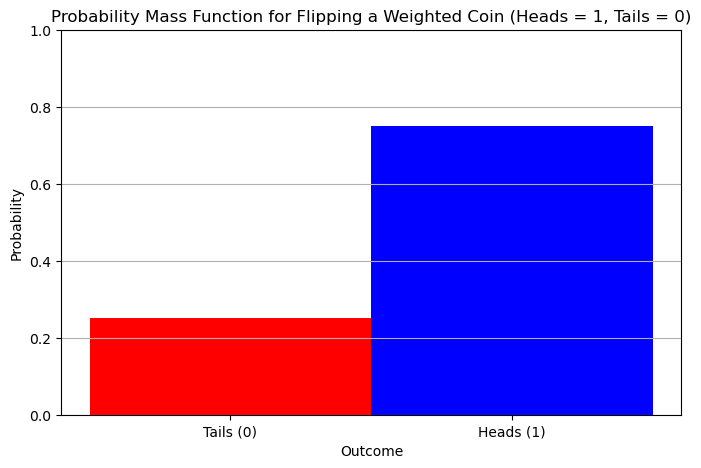

In [13]:
import matplotlib.pyplot as plt
import numpy as np

outcomes_numeric = [1, 0]  # Heads = 1, Tails = 0
probabilities = [0.75, 0.25]

# Plot the PMF with outcomes as 1 for heads and 0 for tails
plt.figure(figsize=(8, 5))
plt.bar(outcomes_numeric, probabilities, width=1, color=['blue', 'red'])

# Labels and title
plt.title("Probability Mass Function for Flipping a Weighted Coin (Heads = 1, Tails = 0)")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.xticks(outcomes_numeric, ['Heads (1)', 'Tails (0)'])
plt.ylim(0, 1)
plt.grid(True, axis='y')

# Show the plot
plt.show()

This produces a discrete probability distribution as the probabilities sum to 1.

What if we flip the coin and get heads (X=1), i.e Pr(X=1 | $\theta$) = $\theta$.

We know $\theta$ is between 0 and 1 so we can plot in that range. 

This is providing us with a view of many different coins with different probabilities.

This IS NOT a PDF as the area is not 1 over all possible values of $\theta$. This is a likelihood as we fix the data and vary the parameter. Bayes rule can be thought of a way to convert a likelihood into a probability distribution. This is why there is a term on the numerator to normalise the area to be 1.

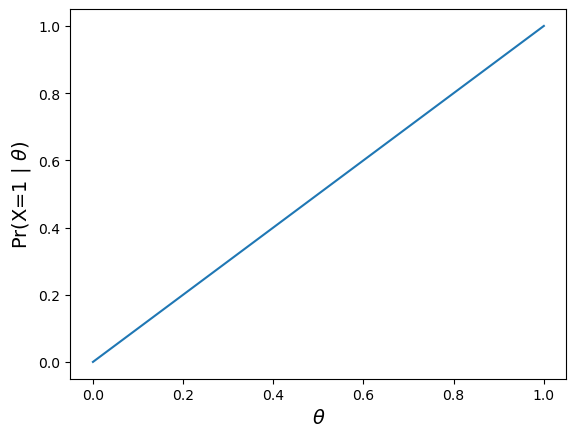

In [11]:
x = np.linspace(0,1,100)
plt.plot(x,x)
plt.ylabel(r'Pr(X=1 | $\theta$)', fontsize=14)
plt.xlabel(r"$\theta$", fontsize=14)
plt.show()

# Improper Priors Example

Lets use the same coin flipping example:

Bernoulli Likelihood:

$\Large{Pr(X=K| \theta) = \theta^{K} (1 - \theta)^{1-K}}$

Lets define a prior for how $\theta$ is distributed.

$\Large{P(\theta) = \frac{1}{\theta(1-\theta)}}$,

where

$\theta$ is between 0 and 1. This is called the Haldane prior.

We can see we have assymptotes at 0 and 1 here. We will show why this is an improper prior.

If we were to integrate the prior, we would get:

$\Large{\int_{0}^{1}\frac{1}{\theta(1-\theta)} d\theta} = \int_{0}^{1} \frac{1}{\theta}\frac{1}{1-\theta}d\theta$

We see that the integral is always > 1/$\theta$ as the second term increases with increasing $\theta$. We see it integrates to $\inf$ --> IMPROPER


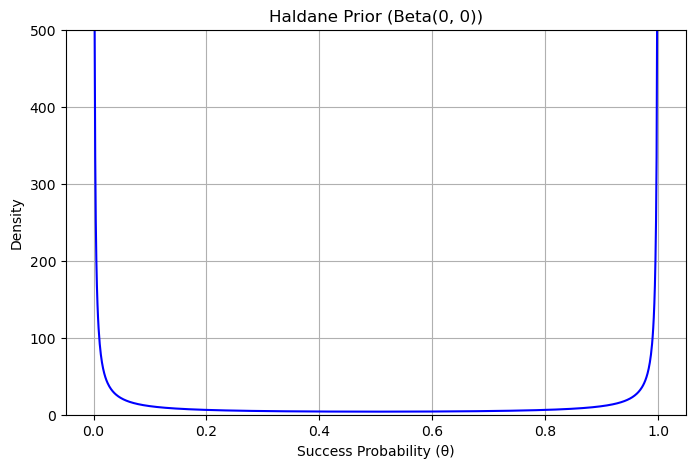

In [14]:
def haldane_prior(x):
    return 1 / (x * (1 - x))

# Generate x values between 0 and 1 (excluding the endpoints 0 and 1)
x = np.linspace(0.001, 0.999, 1000)

# Compute the Haldane prior for each x value
y = haldane_prior(x)

# Plot the Haldane prior
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Haldane Prior", color='blue')

# Labels and title
plt.title("Haldane Prior (Beta(0, 0))")
plt.xlabel("Success Probability (θ)")
plt.ylabel("Density")
plt.ylim(0, 500)  # Set y-limit to make the plot clearer (since it's improper)
plt.grid(True)

# Show the plot
plt.show()

What if we continue using this prior and see if we get a valid probability distribution?

$\Large{P(\theta | X=K) = \frac{Pr(X=K | \theta) P(\theta)}{\int Pr(X = K | \theta) P(\theta)d\theta}}$

which is proportional to the numerator

$\Large{\theta^{K}(1-\theta)^{1-K}\theta^{-1}(1-\theta)^{-1}} = \theta^{K-1}(1-\theta)^{-K}$

What does the posterior look like if we flip and get a tails, X=0.

--> $\theta^{-1}$

If we integrate this posterior we should get 1 if it is a valid probability distribution. We actually get $[\log(\theta)]_{0}^{1}$ which is $\inf$.

NOTE: This only is an issue with exact bayesian inference, i.e plugging in numbers into Bayes rule. We are able to use priors like this when doing MCMC as these only require the un-normalised posterior to generate samples from the posterior.

